# Capítulo 3 - Análise descritiva de dados

## Bibliotecas básicas e outras inicializações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Carregamento dos dados

In [2]:
dados = pd.read_csv('./datasets/mammographic_masses.data', 
                    names=['bi_rads', 'idade', 'forma_da_massa', 'contorno_da_massa', 'densidade_da_massa', 'severidade'], 
                    na_values='?')
print(f'Linhas: {dados.shape[0]} | Colunas: {dados.shape[1]}')
dados.head()

Linhas: 961 | Colunas: 6


,bi_rads,idade,forma_da_massa,contorno_da_massa,densidade_da_massa,severidade
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bi_rads             959 non-null    float64
 1   idade               956 non-null    float64
 2   forma_da_massa      930 non-null    float64
 3   contorno_da_massa   913 non-null    float64
 4   densidade_da_massa  885 non-null    float64
 5   severidade          961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


### Dicionário dos dados

**bi_rads**: sistema de clasificação adotado para estimar qual a chance de determinada imagem da mamografia ser câncer.{0-6}(float)

**idade**: idade do paciente em anos.(float)

**forma_da_massa**: {redonda=1, ovular=2, lobular=3, irregular=4}(float)

**contorno_da_massa**: {circunscrita=1, microlobulada=2, obscura=3, mal definida=4, especulada=5}(float)

**densidade_da_massa**: {alta=1, iso=2, baixa=3, gordurosa=4}(float)

**severidade**: {benigno=0, maligno=1}(inteiro)

## Limpeza da base

In [4]:
for col in dados.iloc[:, 0:5].columns:
    dados[col].fillna(method='ffill', inplace=True)
    
print(f'Valores nulos na base: \n{dados.isnull().sum()}')

Valores nulos na base: 
bi_rads               0
idade                 0
forma_da_massa        0
contorno_da_massa     0
densidade_da_massa    0
severidade            0
dtype: int64


### Dados ruidosos

In [5]:
dados['bi_rads'].value_counts()

4.0     549
5.0     345
3.0      36
2.0      14
6.0      11
0.0       5
55.0      1
Name: bi_rads, dtype: int64

In [6]:
dados['bi_rads'][dados[dados['bi_rads']==55.0].index[0]] = 5.0
dados['bi_rads'].value_counts()

4.0    549
5.0    346
3.0     36
2.0     14
6.0     11
0.0      5
Name: bi_rads, dtype: int64

### Padronização dos dados

In [7]:
for col in dados.columns:
    dados[col] = dados[col].astype(int)    
dados.dtypes

bi_rads               int64
idade                 int64
forma_da_massa        int64
contorno_da_massa     int64
densidade_da_massa    int64
severidade            int64
dtype: object

## Análise descritiva dos dados

### Distribuição de frequência

In [8]:
import math

dados_copy= dados[['idade']].sort_values(by='idade', ascending=True)

n_classe = 5
amplitude_classe = math.ceil((dados_copy['idade'].max() - dados_copy['idade'].min())/n_classe)
limite_inferior = dados_copy['idade'].min()
limite_superior = dados_copy['idade'].max()

frequencias = []
valor = limite_inferior

while valor < limite_superior:
    frequencias.append('{} - {}'.format(round(valor,1), round(valor+amplitude_classe,1)))
    valor += amplitude_classe

In [9]:
freq_abs = pd.qcut(dados_copy['idade'], len(frequencias), labels=frequencias)
freq_rel = [round(i / len(freq_abs) * 100, 1) for i in pd.value_counts(freq_abs)]
freq_acumulada = np.cumsum(freq_rel)

In [10]:
tabela_frequencia = pd.DataFrame({'frequencia_absoluta': pd.value_counts(freq_abs)})
tabela_frequencia['frequencia_relativa'] = freq_rel
tabela_frequencia['frequencia_acumulada'] = freq_acumulada
tabela_frequencia

,frequencia_absoluta,frequencia_relativa,frequencia_acumulada
18 - 34,208,21.6,21.6
34 - 50,196,20.4,42.0
50 - 66,191,19.9,61.9
82 - 98,189,19.7,81.6
66 - 82,177,18.4,100.0


### Visualização dos dados

In [11]:
import matplotlib
matplotlib.style.use(['ggplot'])

plt.rcParams['axes.facecolor']='white'
plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

Histograma

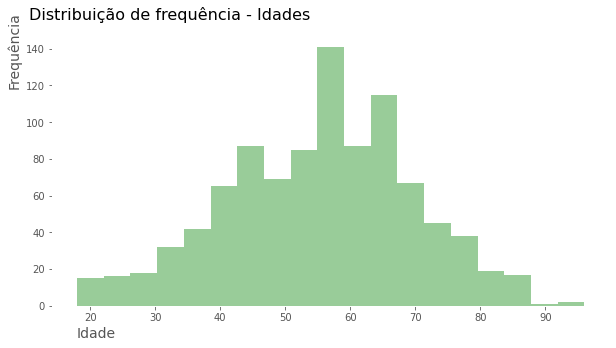

In [12]:
ax = sns.distplot(dados['idade'], kde=False, color='g')
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição de frequência - Idades', fontsize=16, y=1.03, loc='left', x=-0.04)
ax.set_ylabel('Frequência', horizontalalignment='left', y=0.80, fontsize=14)
ax.set_xlabel('Idade', horizontalalignment='right', x=0.115, fontsize=14)
plt.show()

Ogiva

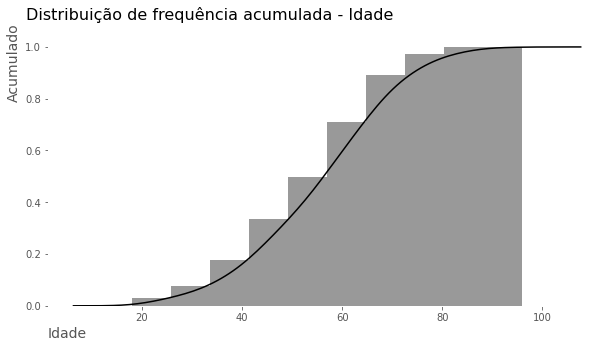

In [13]:
ax = sns.distplot(dados['idade'], hist_kws={'cumulative':True}, kde_kws={'cumulative':True}, bins=10, color='k')
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição de frequência acumulada - Idade', fontsize=16, y=1.03, loc='left', x=-0.04)
ax.set_ylabel('Acumulado', horizontalalignment='left', y=0.75, fontsize=14)
ax.set_xlabel('Idade', horizontalalignment='right', x=0.07, fontsize=14)
plt.show()

Pareto

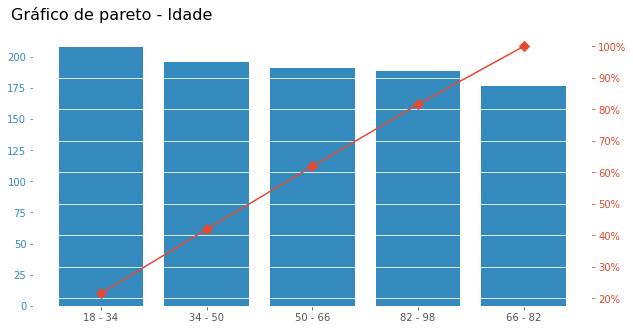

In [14]:
from matplotlib.ticker import PercentFormatter

tabela_frequencia = tabela_frequencia.sort_values(by='frequencia_absoluta',ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(tabela_frequencia.index, tabela_frequencia['frequencia_absoluta'], color='C1')
ax.tick_params(axis='y', colors='C1')

ax2 = ax.twinx()
ax2.plot(tabela_frequencia.index, tabela_frequencia['frequencia_acumulada'], color='C0', marker='D', ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(axis='y', colors='C0')

plt.title('Gráfico de pareto - Idade', fontsize=16, y=1.03, loc='left', x=-0.04)
plt.show()

Dispersão

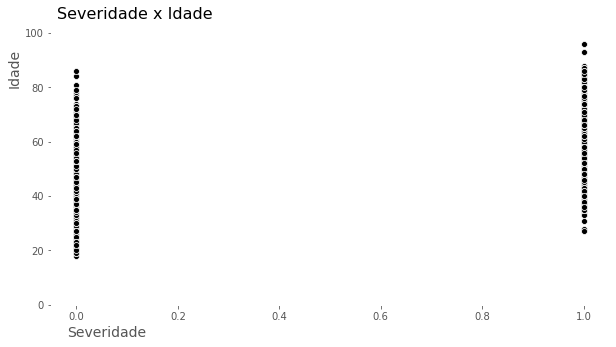

In [15]:
ax = sns.scatterplot(dados['severidade'], dados['idade'], color='k')
ax.figure.set_size_inches(10, 5)
ax.set_title('Severidade x Idade', fontsize=16, y=1.03, loc='left', x=0.01)
ax.set_ylabel('Idade', horizontalalignment='left', y=0.80, fontsize=14)
ax.set_xlabel('Severidade', horizontalalignment='right', x=0.17, fontsize=14)
plt.ylim(0, 100)
plt.show()

### Medidas de resumo dos dados

Medidas de tendência central

In [16]:
print('Média: ', round(dados['idade'].mean(), 1))
print('Mediana: ', dados['idade'].median())
print('Ponto médio: ', (dados['idade'].max() + dados['idade'].min())/2)
print('Moda: ', dados['idade'].mode()[0])

Média:  55.4
Mediana:  57.0
Ponto médio:  57.0
Moda:  59


Medidas de dispersão

In [17]:
print('Amplitude: ', dados['idade'].max() - dados['idade'].min())
print('Desvio padrão:', round(dados['idade'].std(), 2))
print('Variância: ', round(dados['idade'].var(), 2))
print('Coeficiente de variação: ', round((dados['idade'].std()/dados['idade'].mean())*100, 2), '%')

Amplitude:  78
Desvio padrão: 14.51
Variância:  210.45
Coeficiente de variação:  26.18 %


Medidas de forma

Curtose:  -0.32379315637045325
Assimetria:  -0.2031552215779338 



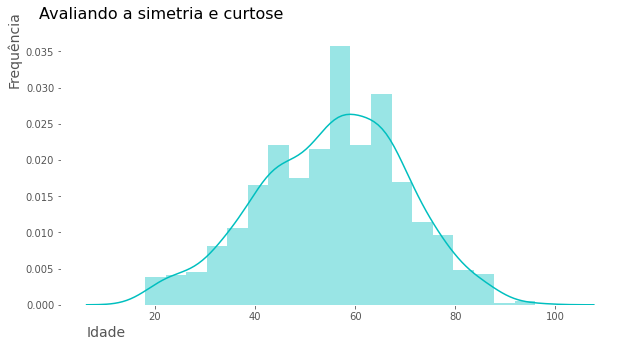

In [18]:
print('Curtose: ', dados['idade'].kurtosis())
print('Assimetria: ', dados['idade'].skew(), '\n')

ax = sns.distplot(dados['idade'], kde=True, color='c')
ax.figure.set_size_inches(10, 5)
ax.set_title('Avaliando a simetria e curtose', fontsize=16, y=1.03, loc='left', x=-0.04)
ax.set_ylabel('Frequência', horizontalalignment='left', y=0.80, fontsize=14)
ax.set_xlabel('Idade', horizontalalignment='right', x=0.115, fontsize=14)
plt.show()

Medidas de posição relativa

In [19]:
print('Escore Z:')
(dados['idade'].head(5) - dados['idade'].mean()) / dados['idade'].std()

Escore Z:


0    0.799154
1   -0.855248
2    0.178754
3   -1.889250
4    1.281688
Name: idade, dtype: float64

In [20]:
print('Quartis: ')
dados['idade'].quantile([0.25,0.5,0.75])

Quartis: 


0.25    45.0
0.50    57.0
0.75    66.0
Name: idade, dtype: float64

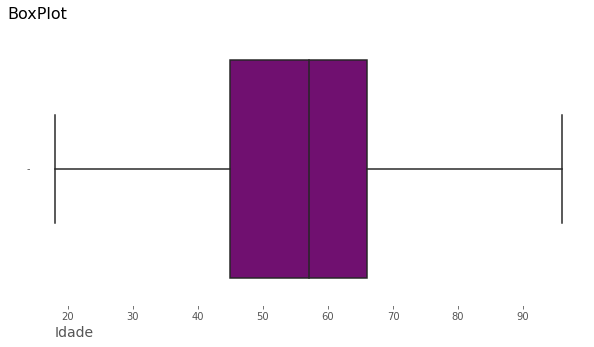

In [21]:
ax = sns.boxplot(dados['idade'], color='purple')
ax.figure.set_size_inches(10, 5)
ax.set_title('BoxPlot', fontsize=16, y=1.03, loc='left', x=-0.04)
ax.set_xlabel('Idade', horizontalalignment='right', x=0.115, fontsize=14)
plt.show()